In [10]:
import csv
import numpy as np
from pandas import Series,DataFrame
import pandas as pd

import scipy as stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [112]:
#builds the foundational dataframe

murders_by_aisp = pd.read_csv('/Users/drewforeman/Documents/rioexp/opendirs_test/output.csv',header=None)

murders_by_aisp = murders_by_aisp.transpose()

murders_by_aisp.columns = pd.date_range('20090101', periods=81, freq='M').strftime('%m-%Y')

neighborhood_index=['02-Botafogo,Flamengo','03-Engenhao','04,05,06-Maracana,Centro,Tijuca','07-Sao Goncalo',
                    '08-Campos','09,41-Oswaldo Cruz,Pavuna','10-Barra do Pirai','11-Nova Friburgo','12-Niteroi',
                    '14-Bangu','15-Duque de Caxias','16-Penha','17-Ilha do Gov','18-Jacarepagua','19 Cobacabana',
                    '20 Nova Iguacu','21 Sao Joao de Meriti','22-Av Brasil Area','23-Ipanema,Sao Conarado,Rocinha,Lagoa',
                    '24-Itaguai','25-Cabo Frio','26-Petropolis','27,40-Guaratiba,Campo Grande','28,37-Volta Redonda,Itatiaia',
                    '29-Itaperuna','30-Teresopolis','31-Barra','32-Macae','33-Angra dos Reis','34-Mage','35-Itaborai',
                    '36-Itaocara','38-Tres Rios','39-Belford Roxo']

murders_by_aisp['AISP-Bairro']= neighborhood_index

#Geo-index orders AISPs by distance from Zona Sul (Copacabana beach as reference pt), split by east and west
murders_by_aisp['Geo-index']=[13,15,10,19,32,8,3,30,16,6,21,17,18,9,12,23,20,14,11,4,29,26,5,2,
                            33,27,7,34,1,25,24,31,28,22]
murders_by_aisp = murders_by_aisp.sort_values('Geo-index')

#rearranging the columns
cols = murders_by_aisp.columns.tolist()
cols = cols[-2:] + cols[:-2]
murders_by_aisp = murders_by_aisp[cols]


murders_by_aisp

,AISP-Bairro,Geo-index,01-2009,02-2009,03-2009,04-2009,05-2009,06-2009,07-2009,08-2009,...,12-2014,01-2015,02-2015,03-2015,04-2015,05-2015,06-2015,07-2015,08-2015,09-2015
28,33-Angra dos Reis,1,5.030,4.240,3.080,3.870,3.820,3.040,2.650,3.020,...,3.840000,4.180000,1.390000,5.190000,3.110000,2.410000,3.09,2.400,3.420000,5.790000
23,"28,37-Volta Redonda,Itatiaia",2,2.070,1.980,2.600,3.920,2.695,1.655,2.165,1.760,...,1.715000,0.800000,1.335000,1.495000,1.335000,1.170000,1.17,1.220,1.330000,1.855000
6,10-Barra do Pirai,3,0.790,1.050,0.260,1.320,0.520,2.090,1.040,0.780,...,2.760000,0.920000,1.230000,1.840000,1.220000,1.220000,0.31,1.220,1.830000,0.610000
19,24-Itaguai,4,5.550,2.570,4.140,2.970,3.140,2.350,2.540,2.730,...,5.260000,5.250000,5.040000,5.240000,6.840000,4.420000,5.01,4.610,4.800000,4.190000
22,"27,40-Guaratiba,Campo Grande",5,4.970,4.290,5.480,4.345,5.040,2.440,2.765,3.240,...,2.520000,2.110000,0.910000,2.315000,1.915000,1.610000,1.21,1.905,2.105000,2.210000
9,14-Bangu,6,2.730,3.490,3.160,2.400,2.500,2.060,2.710,1.950,...,1.450000,1.890000,1.740000,1.020000,1.890000,3.050000,1.88,1.880,1.590000,1.590000
26,31-Barra,7,0.710,1.060,1.060,1.420,0.350,1.040,0.690,0.690,...,1.920000,0.000000,2.240000,2.240000,0.640000,0.960000,0.96,0.320,0.640000,0.000000
5,"09,41-Oswaldo Cruz,Pavuna",8,6.220,5.750,3.990,4.580,6.920,4.570,3.870,4.220,...,1.780000,3.005000,2.440000,2.345000,2.530000,2.250000,2.43,2.245,1.590000,2.330000
13,18-Jacarepagua,9,1.720,1.710,1.030,0.340,1.190,1.020,1.350,1.520,...,1.720000,1.910000,1.710000,1.330000,1.330000,2.470000,1.14,0.950,1.330000,1.710000
2,"04,05,06-Maracana,Centro,Tijuca",10,5.422,11.402,3.278,6.796,5.430,7.600,8.724,1.776,...,2.306667,1.526667,2.343333,1.536667,1.733333,3.696667,1.21,1.050,0.723333,1.586667


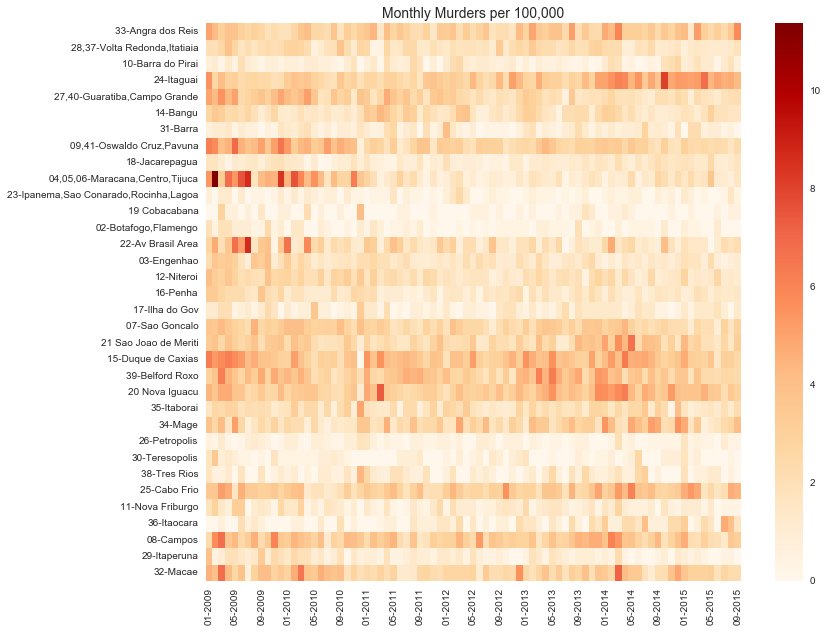

In [113]:
fig= plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
ax.set_title('Monthly Murders per 100,000',fontsize=14)

sns.heatmap(ax=ax, data=murders_by_aisp.ix[:,2:],yticklabels= murders_by_aisp.ix[:,0],
            xticklabels=4,cmap='OrRd')

In [304]:
#since smaller population of some reporting districts can skew the data, we look at averages for trimester

dates = pd.date_range('20090101', periods=81, freq='M').strftime('%m-%Y')

T1_09 = murders_by_aisp[dates[0:3]].sum(axis=1)
T2_09 = murders_by_aisp[dates[3:7]].sum(axis=1)
T3_09 = murders_by_aisp[dates[7:11]].sum(axis=1)
T1_10 = murders_by_aisp[dates[11:15]].sum(axis=1)
T2_10 = murders_by_aisp[dates[15:19]].sum(axis=1)
T3_10 = murders_by_aisp[dates[19:23]].sum(axis=1)
T1_11 = murders_by_aisp[dates[23:27]].sum(axis=1)
T2_11 = murders_by_aisp[dates[27:31]].sum(axis=1)
T3_11 = murders_by_aisp[dates[31:35]].sum(axis=1)
T1_12 = murders_by_aisp[dates[35:39]].sum(axis=1)
T2_12 = murders_by_aisp[dates[39:43]].sum(axis=1)
T3_12 = murders_by_aisp[dates[43:47]].sum(axis=1)
T1_13 = murders_by_aisp[dates[47:51]].sum(axis=1)
T2_13 = murders_by_aisp[dates[51:55]].sum(axis=1)
T3_13 = murders_by_aisp[dates[55:59]].sum(axis=1)
T1_14 = murders_by_aisp[dates[59:63]].sum(axis=1)
T2_14 = murders_by_aisp[dates[63:67]].sum(axis=1)
T3_14 = murders_by_aisp[dates[67:71]].sum(axis=1)
T1_15 = murders_by_aisp[dates[71:75]].sum(axis=1)
T2_15 = murders_by_aisp[dates[75:79]].sum(axis=1)

murders_by_aisp_tri = pd.concat([T1_09,T2_09,T3_09,T1_10,T2_10,T3_10,T1_11,T2_11,T3_11,T1_12,
                                 T2_12,T3_12,T1_13,T2_13,T3_13,T1_14,T2_14,T3_14,T1_15,T2_15], axis=1)
labels=['T1 09',' ',' ','T1 10',' ',' ','T1 11',' ',' ','T1 12',' ',' ',
        'T1 13',' ',' ','T1 14',' ',' ','T1 15',' ']

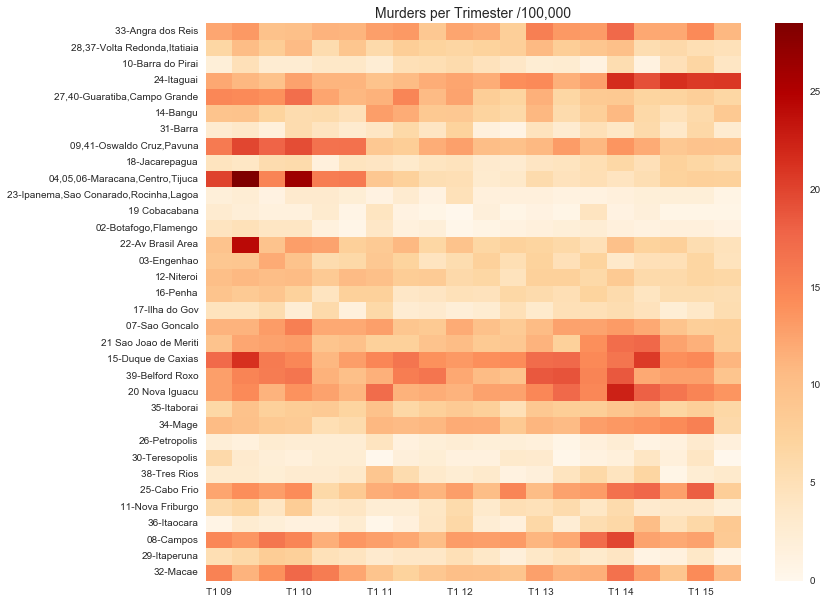

In [305]:
fig= plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
ax.set_title('Murders per Trimester /100,000',fontsize=14)

sns.heatmap(ax=ax, data=murders_by_aisp_tri,yticklabels= murders_by_aisp.ix[:,0],
            xticklabels=labels,cmap='OrRd')

In [118]:
#and annualy

dates = pd.date_range('20090101', periods=81, freq='M').strftime('%m-%Y')

Y2009 = murders_by_aisp[dates[0:12]].sum(axis=1)
Y2010 = murders_by_aisp[dates[12:24]].sum(axis=1)
Y2011 = murders_by_aisp[dates[24:36]].sum(axis=1)
Y2012 = murders_by_aisp[dates[36:48]].sum(axis=1)
Y2013 = murders_by_aisp[dates[48:60]].sum(axis=1)
Y2014 = murders_by_aisp[dates[60:72]].sum(axis=1)

murders_by_aisp_year = pd.concat([Y2009,Y2010,Y2011,Y2012,Y2013,Y2014], axis=1)

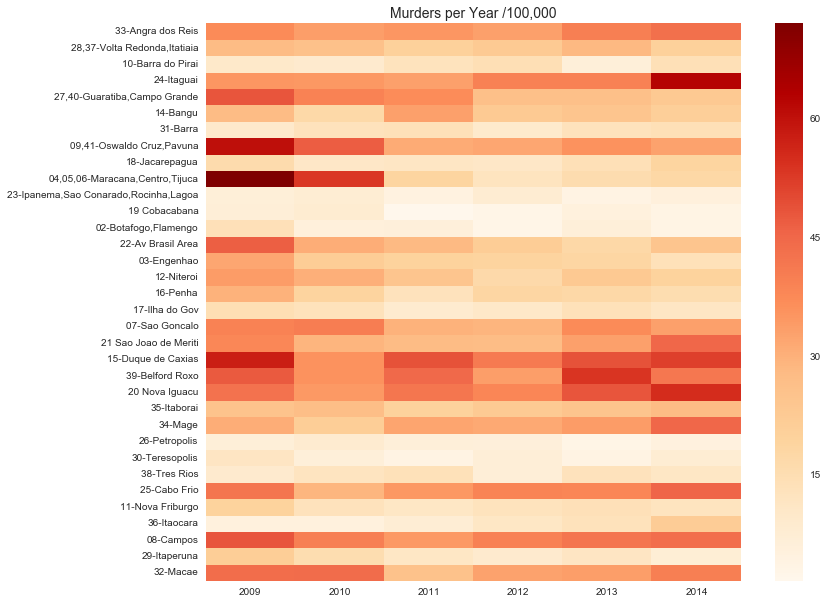

In [121]:
fig= plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
ax.set_title('Murders per Year /100,000',fontsize=14)

years=[2009,2010,2011,2012,2013,2014]

sns.heatmap(ax=ax, data=murders_by_aisp_year,yticklabels= murders_by_aisp.ix[:,0],
            xticklabels=years,cmap='OrRd')

In [285]:
#bring macro crime data into ipython

murders = pd.read_csv('/Users/drewforeman/Documents/rioexp/Estadual_Data/estadual_murders.csv')
drugs = pd.read_csv('/Users/drewforeman/Documents/rioexp/Estadual_Data/estadual_drugs.csv')
arms = pd.read_csv('/Users/drewforeman/Documents/rioexp/Estadual_Data/estadual_arms.csv')
AdR = pd.read_csv('/Users/drewforeman/Documents/rioexp/Estadual_Data/estadual_AdR.csv')
roubos = pd.read_csv('/Users/drewforeman/Documents/rioexp/Estadual_Data/estadual_roubos.csv')
furtos = pd.read_csv('/Users/drewforeman/Documents/rioexp/Estadual_Data/estadual_furtos.csv')

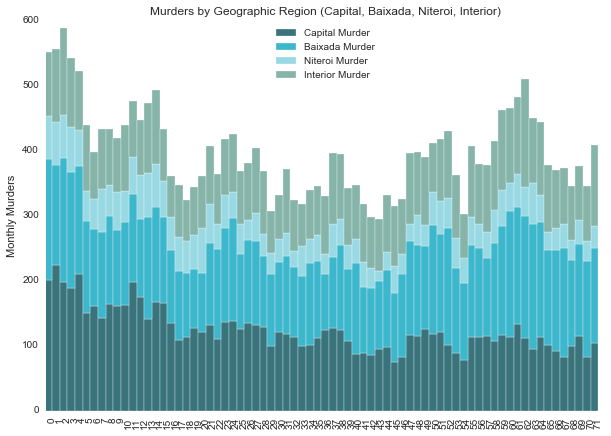

In [293]:
fig= plt.figure(figsize=(10,7),facecolor='white')
ax = fig.add_subplot(111,axisbg='white')
ttl = 'Murders by Geographic Region (Capital, Baixada, Niteroi, Interior)'

plt.ylabel('Monthly Murders')

murders.plot(kind='bar',stacked=True,ax=ax, width=1,edgecolor='white',
                 title=ttl,color=['#39737C','#3CB7CC','#98D9E4','#86B4A9'])

In [190]:
#find percent of total murders for each region
murders['Total'] = (murders['Capital Murder'] + murders['Baixada Murder'] + 
                    murders['Niteroi Murder'] + murders['Interior Murder'])
murders['Pct Cap'] = 100*(murders['Capital Murder']/murders['Total'])
murders['Pct Bax'] = 100*(murders['Baixada Murder']/murders['Total'])
murders['Pct Nit'] = 100*(murders['Niteroi Murder']/murders['Total'])
murders['Pct Int'] = 100*(murders['Interior Murder']/murders['Total'])


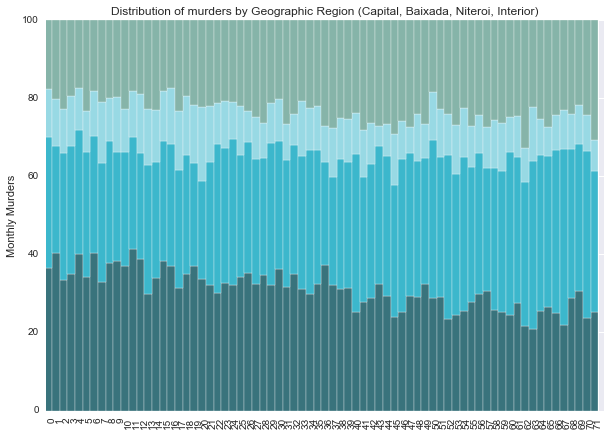

In [264]:
murder_pct = murders.ix[:,5:]

fig= plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
ttl = 'Distribution of murders by Geographic Region (Capital, Baixada, Niteroi, Interior)'

plt.ylabel('Monthly Murders')
plt.xticks(range(2009,2014))


murder_pct.plot(kind='bar',stacked=True,ax=ax,legend=False, width=1,edgecolor='white',
                ylim=(0,100), title=ttl,color=['#39737C','#3CB7CC','#98D9E4','#86B4A9'])


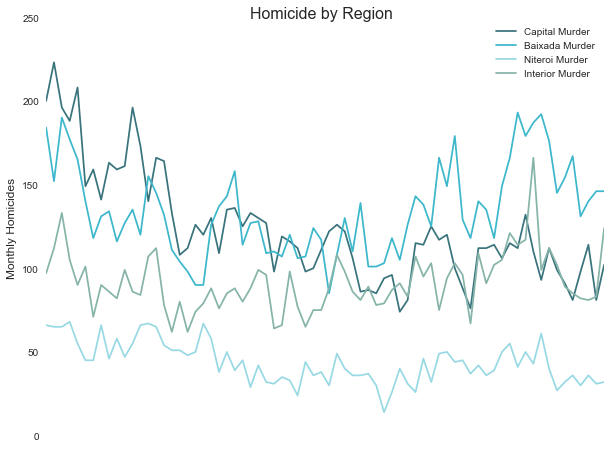

In [247]:
plt.figure(figsize=(10,7.5),facecolor='white')
ax = plt.subplot(111,axisbg='white')
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
plt.text(35,250,'Homicide by Region',fontsize=16,ha='center')

plt.ylabel('Monthly Homicides',fontsize=12)
plt.xticks(range(2009,2014,1))

murders.ix[:,:4].plot(ax=ax,kind='line',color=['#39737C','#3CB7CC','#98D9E4','#86B4A9'])

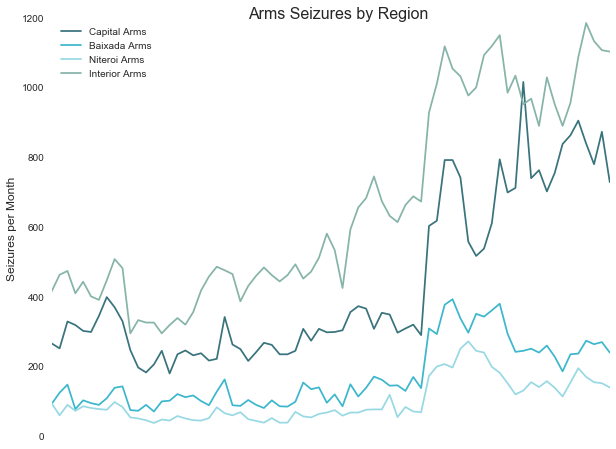

In [268]:
plt.figure(figsize=(10,7.5),facecolor='white')
ax = plt.subplot(111,axisbg='white')
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
plt.text(25,1200,'Arms Seizures by Region',fontsize=16)

plt.ylabel('Seizures per Month',fontsize=12)
plt.xticks(range(2009,2014,1))

arms.plot(ax=ax,kind='line',color=['#39737C','#3CB7CC','#98D9E4','#86B4A9'])

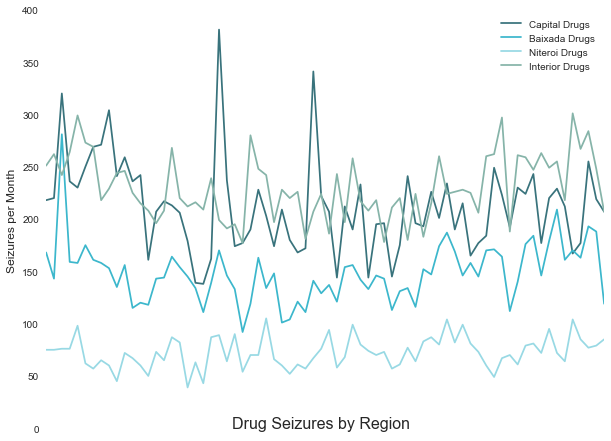

In [271]:
plt.figure(figsize=(10,7.5),facecolor='white')
ax = plt.subplot(111,axisbg='white')
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
plt.text(35,1,'Drug Seizures by Region',fontsize=16,ha='center')

plt.ylabel('Seizures per Month',fontsize=12)
plt.xticks(range(2009,2014,1))

drugs.plot(ax=ax,kind='line',color=['#39737C','#3CB7CC','#98D9E4','#86B4A9'])

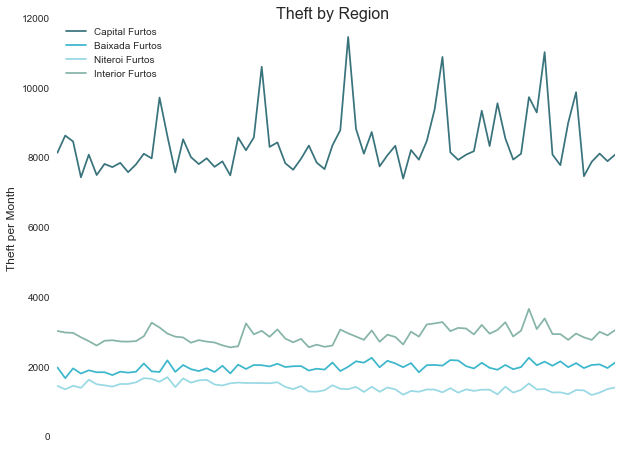

In [263]:
plt.figure(figsize=(10,7.5),facecolor='white')
ax = plt.subplot(111,axisbg='white')
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
plt.text(35,12000,'Theft by Region',fontsize=16,ha='center')

plt.ylabel('Theft per Month',fontsize=12)
plt.xticks(range(2009,2014,1))

furtos.plot(ax=ax,kind='line',color=['#39737C','#3CB7CC','#98D9E4','#86B4A9'])

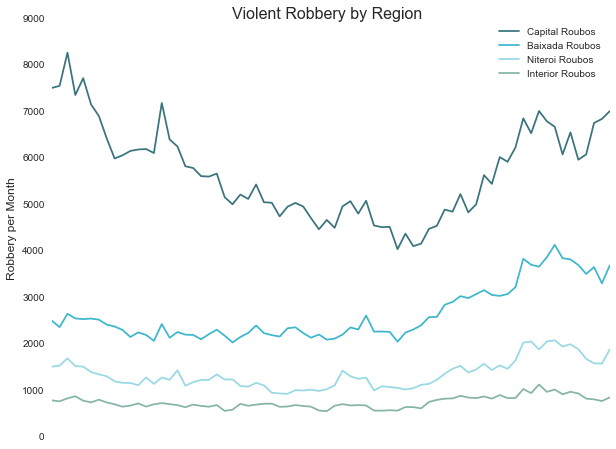

In [262]:
plt.figure(figsize=(10,7.5),facecolor='white')
ax = plt.subplot(111,axisbg='white')
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
plt.text(35,9000,'Violent Robbery by Region',fontsize=16,ha='center')

plt.ylabel('Robbery per Month',fontsize=12)
plt.xticks(range(2009,2014,1))

roubos.plot(ax=ax,kind='line',color=['#39737C','#3CB7CC','#98D9E4','#86B4A9'])

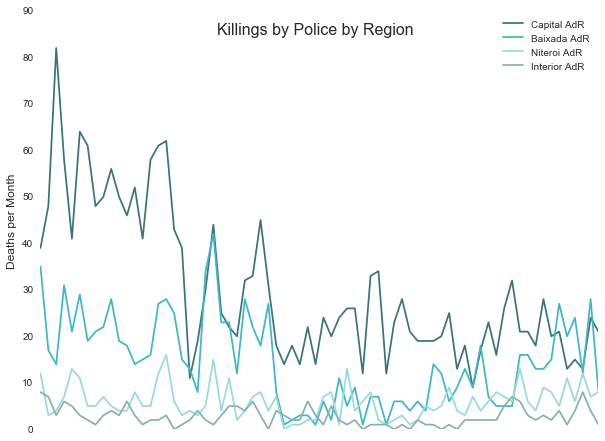

In [267]:
plt.figure(figsize=(10,7.5),facecolor='white')
ax = plt.subplot(111,axisbg='white')
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
plt.text(35,85,'Killings by Police by Region',fontsize=16,ha='center')

plt.ylabel('Deaths per Month',fontsize=12)
plt.xticks(range(2009,2014,1))

AdR.plot(ax=ax,kind='line',color=['#39737C','#3CB7CC','#98D9E4','#86B4A9'])

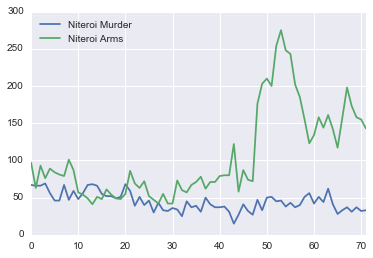

In [324]:
regional_data=pd.concat([murders,drugs,arms,AdR,roubos,furtos],axis=1)
# regional_data
# sns.lmplot('Capital Drugs','Capital Arms',regional_data,fit_reg=False)
arms_drugs_comp = pd.concat([murders.ix[:,2],arms.ix[:,2]],axis=1)
arms_drugs_comp.plot(kind='line')

In [341]:
#builds the foundational arms dataframe

arms_by_aisp = pd.read_csv('/Users/drewforeman/Documents/rioexp/opendirs_test/arms_by_aisp.csv',header=None)

arms_by_aisp = arms_by_aisp.transpose()

arms_by_aisp.columns = pd.date_range('20090101', periods=81, freq='M').strftime('%m-%Y')

arms_by_aisp['AISP-Bairro']= neighborhood_index

#Geo-index orders AISPs by distance from Zona Sul (Copacabana beach as reference pt), split by east and west
arms_by_aisp['Geo-index']=[13,15,10,19,32,8,3,30,16,6,21,17,18,9,12,23,20,14,11,4,29,26,5,2,
                            33,27,7,34,1,25,24,31,28,22]
arms_by_aisp = arms_by_aisp.sort_values('Geo-index')

#rearranging the columns
cols = arms_by_aisp.columns.tolist()
cols = cols[-2:] + cols[:-2]
arms_by_aisp = arms_by_aisp[cols]
arms_by_aisp = arms_by_aisp.drop(arms_by_aisp.index[9])


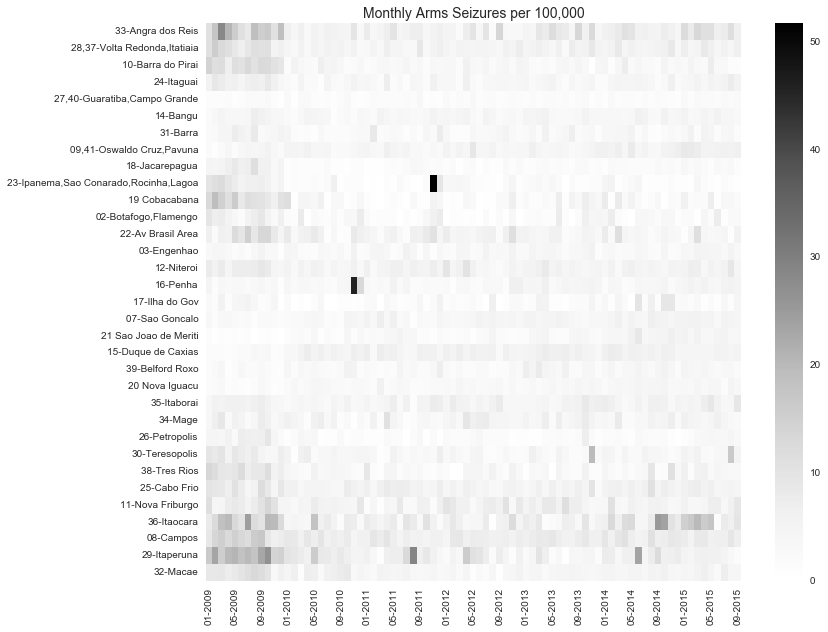

In [344]:
fig= plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
ax.set_title('Monthly Arms Seizures per 100,000',fontsize=14)

sns.heatmap(ax=ax, data=arms_by_aisp.ix[:,2:],yticklabels= arms_by_aisp.ix[:,0],
            xticklabels=4,cmap='Greys')

In [342]:
dates = pd.date_range('20090101', periods=81, freq='M').strftime('%m-%Y')

T1_09 = arms_by_aisp[dates[0:3]].sum(axis=1)
T2_09 = arms_by_aisp[dates[3:7]].sum(axis=1)
T3_09 = arms_by_aisp[dates[7:11]].sum(axis=1)
T1_10 = arms_by_aisp[dates[11:15]].sum(axis=1)
T2_10 = arms_by_aisp[dates[15:19]].sum(axis=1)
T3_10 = arms_by_aisp[dates[19:23]].sum(axis=1)
T1_11 = arms_by_aisp[dates[23:27]].sum(axis=1)
T2_11 = arms_by_aisp[dates[27:31]].sum(axis=1)
T3_11 = arms_by_aisp[dates[31:35]].sum(axis=1)
T1_12 = arms_by_aisp[dates[35:39]].sum(axis=1)
T2_12 = arms_by_aisp[dates[39:43]].sum(axis=1)
T3_12 = arms_by_aisp[dates[43:47]].sum(axis=1)
T1_13 = arms_by_aisp[dates[47:51]].sum(axis=1)
T2_13 = arms_by_aisp[dates[51:55]].sum(axis=1)
T3_13 = arms_by_aisp[dates[55:59]].sum(axis=1)
T1_14 = arms_by_aisp[dates[59:63]].sum(axis=1)
T2_14 = arms_by_aisp[dates[63:67]].sum(axis=1)
T3_14 = arms_by_aisp[dates[67:71]].sum(axis=1)
T1_15 = arms_by_aisp[dates[71:75]].sum(axis=1)
T2_15 = arms_by_aisp[dates[75:79]].sum(axis=1)

arms_by_aisp_tri = pd.concat([T1_09,T2_09,T3_09,T1_10,T2_10,T3_10,T1_11,T2_11,T3_11,T1_12,
                                 T2_12,T3_12,T1_13,T2_13,T3_13,T1_14,T2_14,T3_14,T1_15,T2_15], axis=1)
labels=['T1 09',' ',' ','T1 10',' ',' ','T1 11',' ',' ','T1 12',' ',' ',
        'T1 13',' ',' ','T1 14',' ',' ','T1 15',' ']

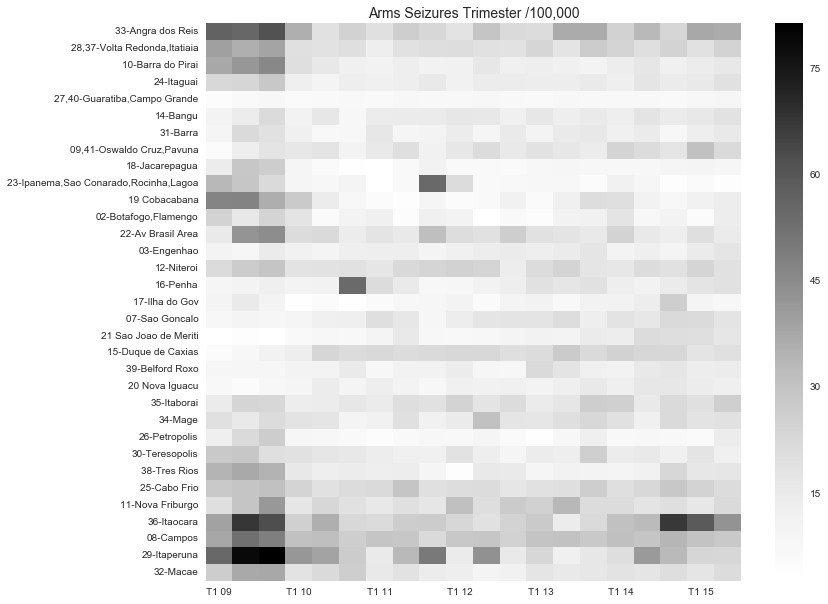

In [345]:
fig= plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
ax.set_title('Arms Seizures Trimester /100,000',fontsize=14)

sns.heatmap(ax=ax, data=arms_by_aisp_tri,yticklabels= arms_by_aisp.ix[:,0],
            xticklabels=labels,cmap='Greys')

In [360]:
furtos_by_aisp = pd.read_csv('/Users/drewforeman/Documents/rioexp/opendirs_test/furtos_by_aisp.csv',header=None)
furtos_by_aisp = furtos_by_aisp.transpose()
furtos_by_aisp.columns = pd.date_range('20090101', periods=81, freq='M').strftime('%m-%Y')
furtos_by_aisp['AISP-Bairro']= neighborhood_index

#Geo-index orders AISPs by distance from Zona Sul (Copacabana beach as reference pt), split by east and west
furtos_by_aisp['Geo-index']=[13,15,10,19,32,8,3,30,16,6,21,17,18,9,12,23,20,14,11,4,29,26,5,2,
                            33,27,7,34,1,25,24,31,28,22]
furtos_by_aisp = furtos_by_aisp.sort_values('Geo-index')

#rearranging the columns
cols = furtos_by_aisp.columns.tolist()
cols = cols[-2:] + cols[:-2]
furtos_by_aisp = furtos_by_aisp[cols]
# furtos_by_aisp
furtos_by_aisp = furtos_by_aisp.drop(furtos_by_aisp.index[9])

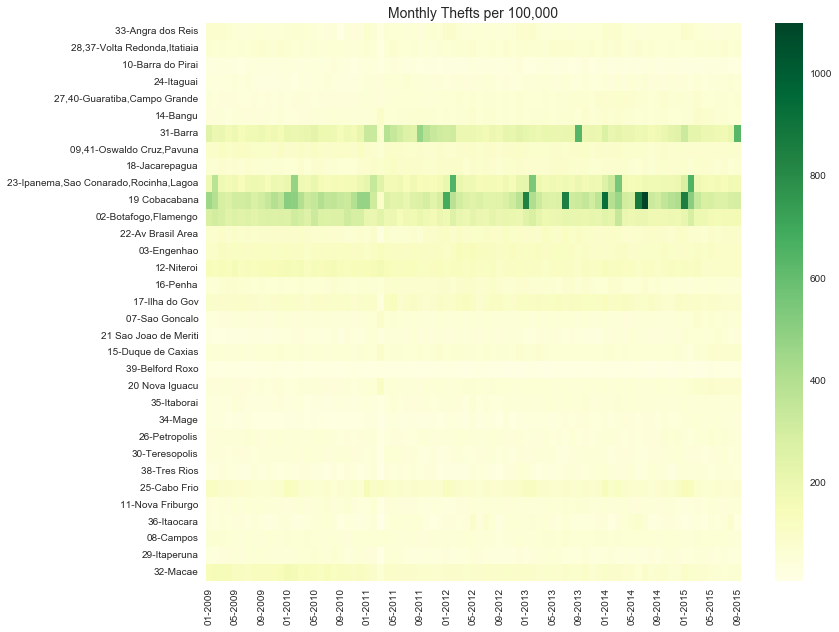

In [361]:
fig= plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
ax.set_title('Monthly Thefts per 100,000',fontsize=14)

sns.heatmap(ax=ax, data=furtos_by_aisp.ix[:,2:],yticklabels= furtos_by_aisp.ix[:,0],
            xticklabels=4,cmap='YlGn')

In [357]:
#builds the foundational roubos dataframe

roubos_by_aisp = pd.read_csv('/Users/drewforeman/Documents/rioexp/opendirs_test/roubos_by_aisp.csv',header=None)

roubos_by_aisp = roubos_by_aisp.transpose()

roubos_by_aisp.columns = pd.date_range('20090101', periods=81, freq='M').strftime('%m-%Y')

roubos_by_aisp['AISP-Bairro']= neighborhood_index

#Geo-index orders AISPs by distance from Zona Sul (Copacabana beach as reference pt), split by east and west
roubos_by_aisp['Geo-index']=[13,15,10,19,32,8,3,30,16,6,21,17,18,9,12,23,20,14,11,4,29,26,5,2,
                            33,27,7,34,1,25,24,31,28,22]
roubos_by_aisp = roubos_by_aisp.sort_values('Geo-index')

#rearranging the columns
cols = roubos_by_aisp.columns.tolist()
cols = cols[-2:] + cols[:-2]
roubos_by_aisp = roubos_by_aisp[cols]
# furtos_by_aisp
roubos_by_aisp = roubos_by_aisp.drop(roubos_by_aisp.index[9])

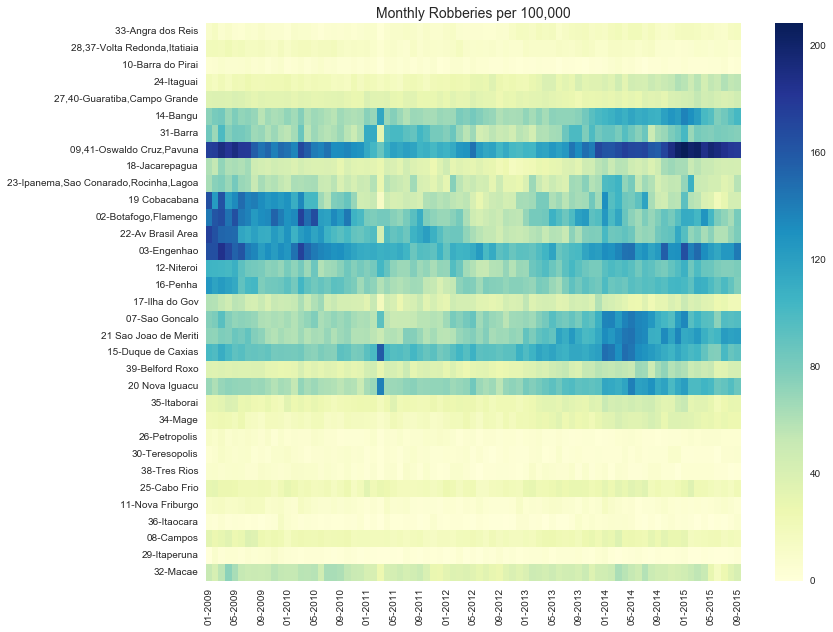

In [364]:
fig= plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
ax.set_title('Monthly Robberies per 100,000',fontsize=14)

sns.heatmap(ax=ax, data=roubos_by_aisp.ix[:,2:],yticklabels= roubos_by_aisp.ix[:,0],
            xticklabels=4,cmap='YlGnBu')